해외 온라인판매는 성장하고 있을까? 어느 국가에서 어떤 품목에 강세를 보일까? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [2]:
import os
if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="NanumGothic")
    
%config InlineBackend.figure_format='retina'

In [3]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [4]:
df=df.rename(columns={'데이터':'백만원'})

In [5]:
df['연도']=df['시점'].map(lambda x : int(x.split('.')[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018
...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022


In [6]:
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))
df

,국가(대륙)별,상품군별,판매유형별,시점,백만원,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [7]:
df.info() #int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만원      2772 non-null   int64 
 5   연도       2772 non-null   int64 
 6   분기       2772 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 151.7+ KB


In [8]:
df.describe().astype(int)

,백만원,연도,분기
count,2772,2772,2772
mean,1613,2019,2
std,4273,1,1
min,-10003,2017,1
25%,41,2018,1
50%,291,2019,2
75%,1181,2021,3
max,47689,2022,4


In [9]:
#음수가 있는듯? -10003 한건 외에 모두 양수라 이상치로 보임
sorted(df['백만원'].unique())

[-10003,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 18

In [10]:
#중간치(50%)로 대치해줌. 
df['백만원'] = df['백만원'].replace(-10003, df['백만원'].median())

In [11]:
df.describe().astype(int)

,백만원,연도,분기
count,2772,2772,2772
mean,1616,2019,2
std,4267,1,1
min,0,2017,1
25%,42,2018,1
50%,291,2019,2
75%,1181,2021,3
max,47689,2022,4


In [12]:
#시점과 데이터에는 결측치가 없고 
#2017~2022년도 까지의 데이터.
#중앙값에 비해 최대치가 너무 높아 평균이 편향을 받은 것으로 보인다.
#우측으로 꼬리가 긴 형태

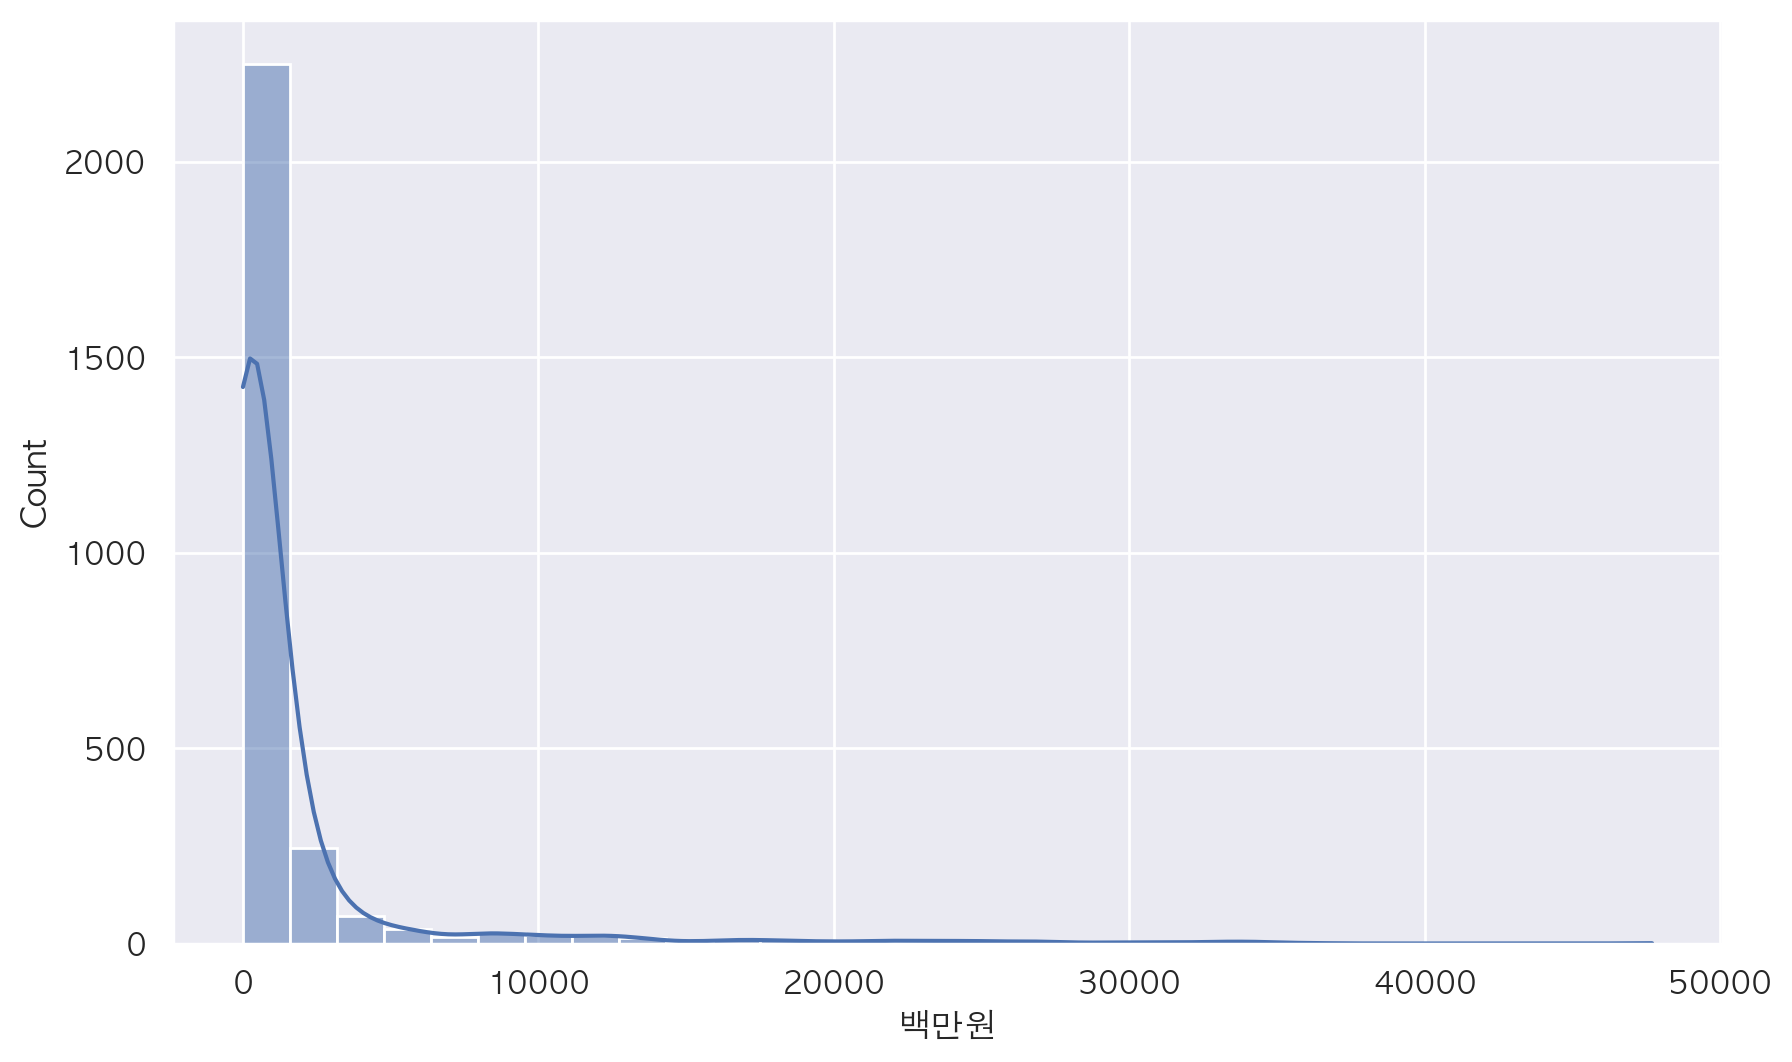

In [13]:
#히스토그램으로ㅠ 확인해보기
plt.figure(figsize=(10, 6))
sns.histplot(df['백만원'], bins=30, kde=True) 
plt.show()


In [14]:
df_country_year = df.pivot_table(index='국가(대륙)별', columns='연도', values='백만원', aggfunc='sum')
df_country_year

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571.0,36141.0,40950.0,44438.0,57959.0,19501.0
대양주,18989.0,17520.0,13191.0,16255.0,16841.0,5044.0
미국,142292.0,156312.0,186617.0,255384.0,277579.0,103416.0
아세안(ASEAN),76457.5,76450.0,82930.0,105360.0,94150.0,38072.0
유럽연합(EU),31068.0,36826.0,39008.0,39865.0,32349.0,9019.0
일본,125442.0,178094.0,189330.0,220730.0,280029.0,131771.0
중국,167240.0,182068.0,210418.0,289446.0,194380.0,98572.0
중남미,10245.0,11669.0,12981.0,12563.0,8298.0,2629.0
중동,8030.0,8019.0,9325.0,11467.0,6164.0,1389.0


/var/folders/1s/7yblwm1x1sx198v0mh4s1tg40000gn/T/ipykernel_18713/3095239019.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x='연도', y='백만원', hue='국가(대륙)별', ci=None, estimator=sum)


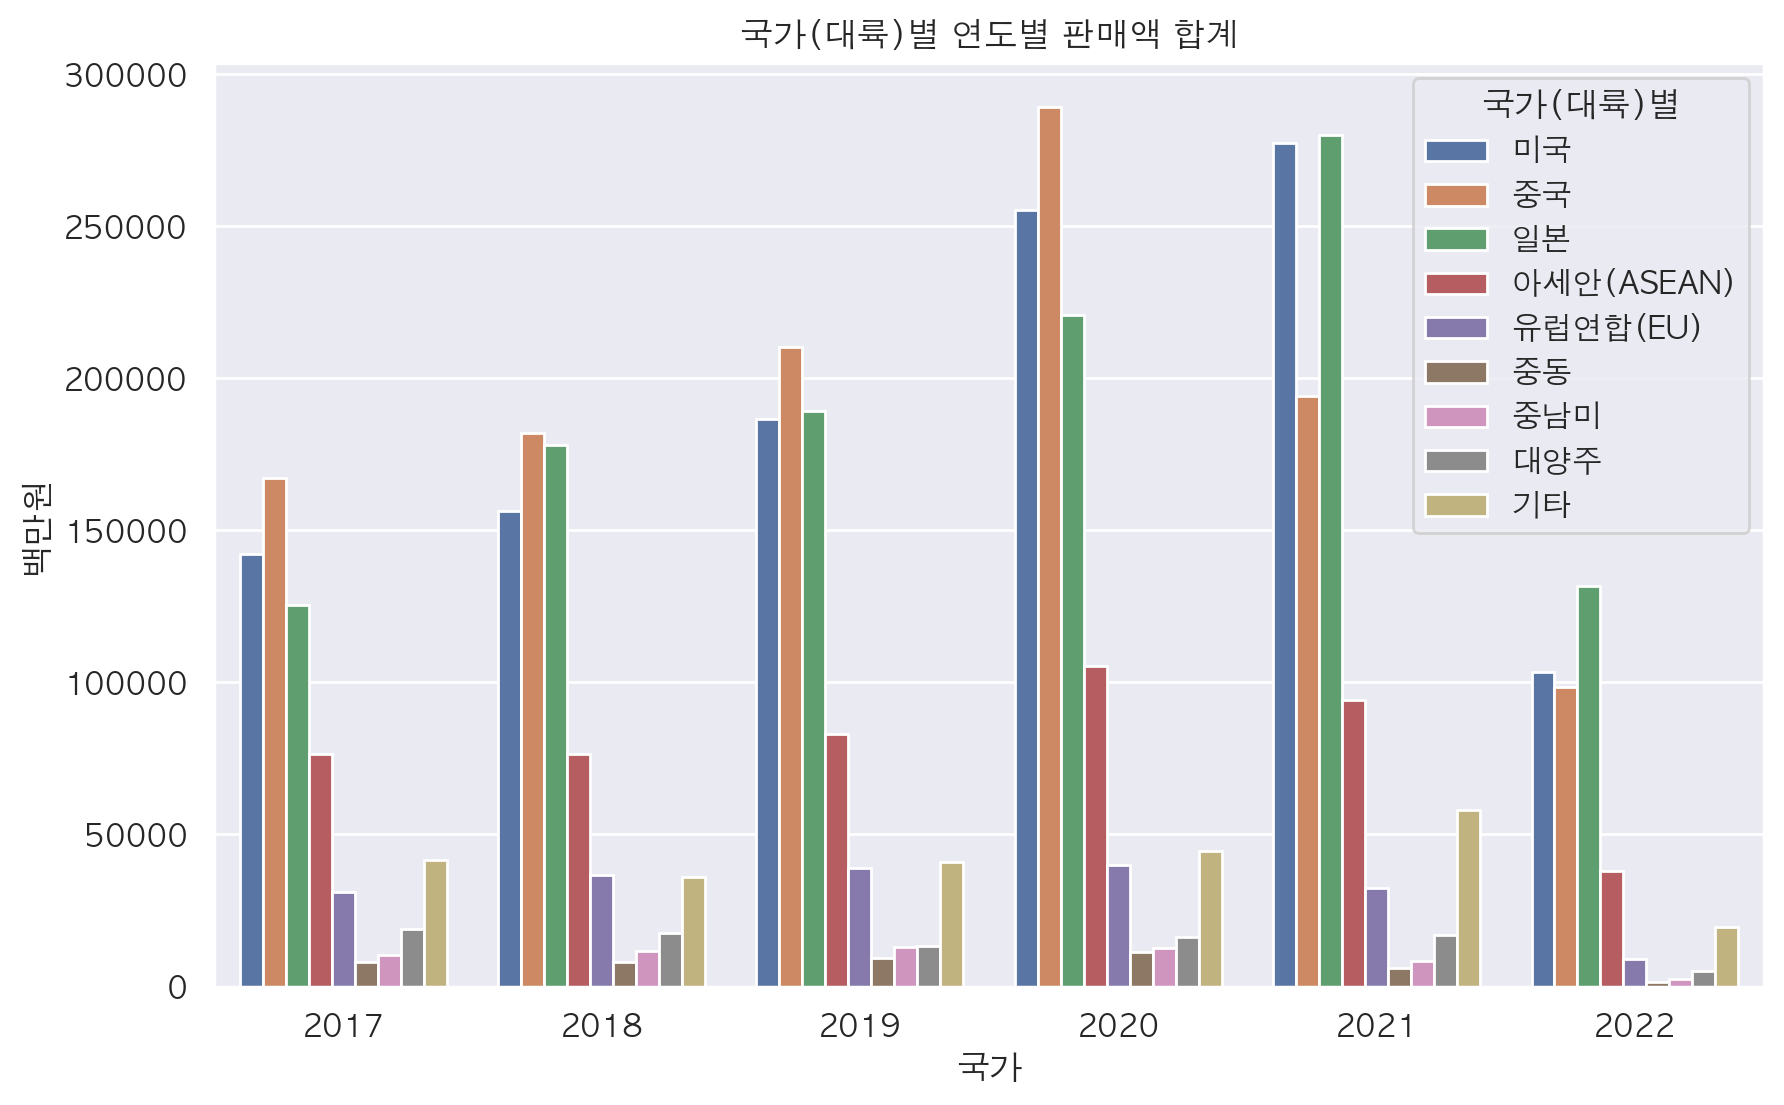

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='연도', y='백만원', hue='국가(대륙)별', ci=None, estimator=sum)
plt.title('국가(대륙)별 연도별 판매액 합계')
plt.xlabel('국가')
plt.ylabel('백만원')

plt.show()

<Axes: xlabel='연도', ylabel='국가(대륙)별'>

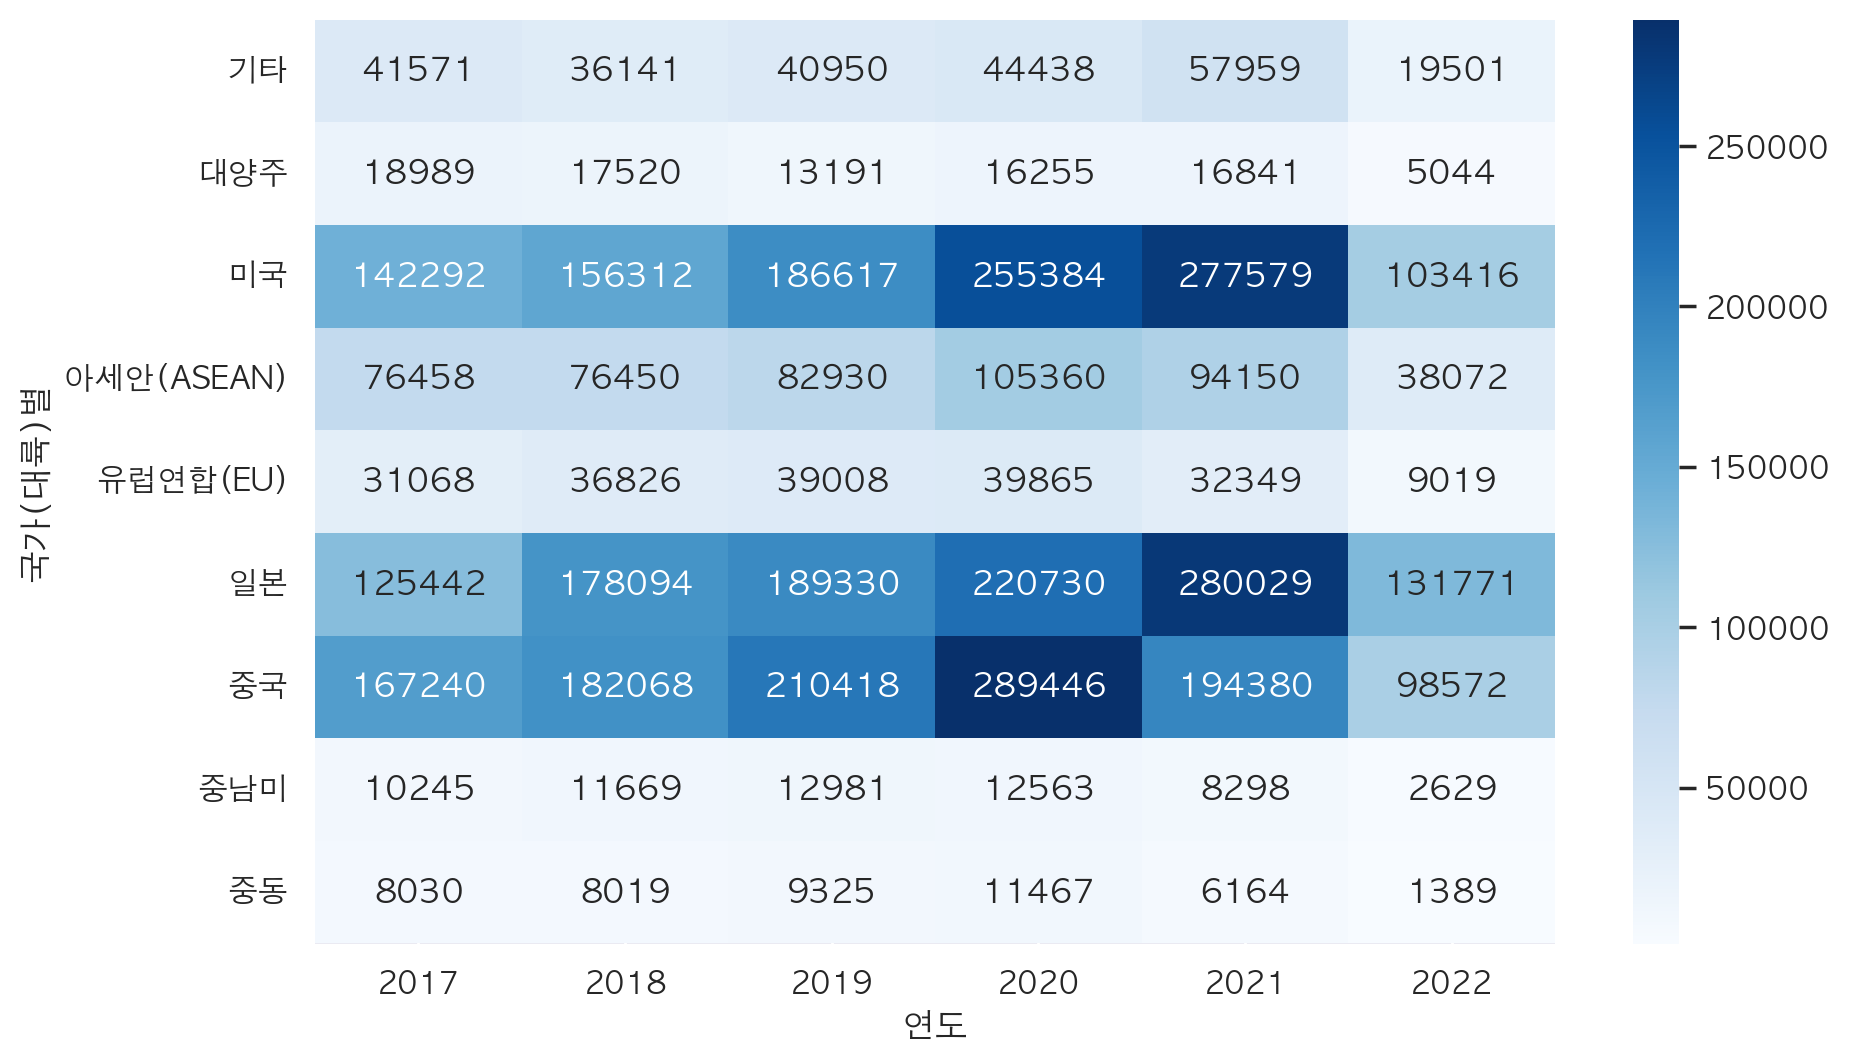

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df_country_year, cmap='Blues', annot=True,fmt='.0f')

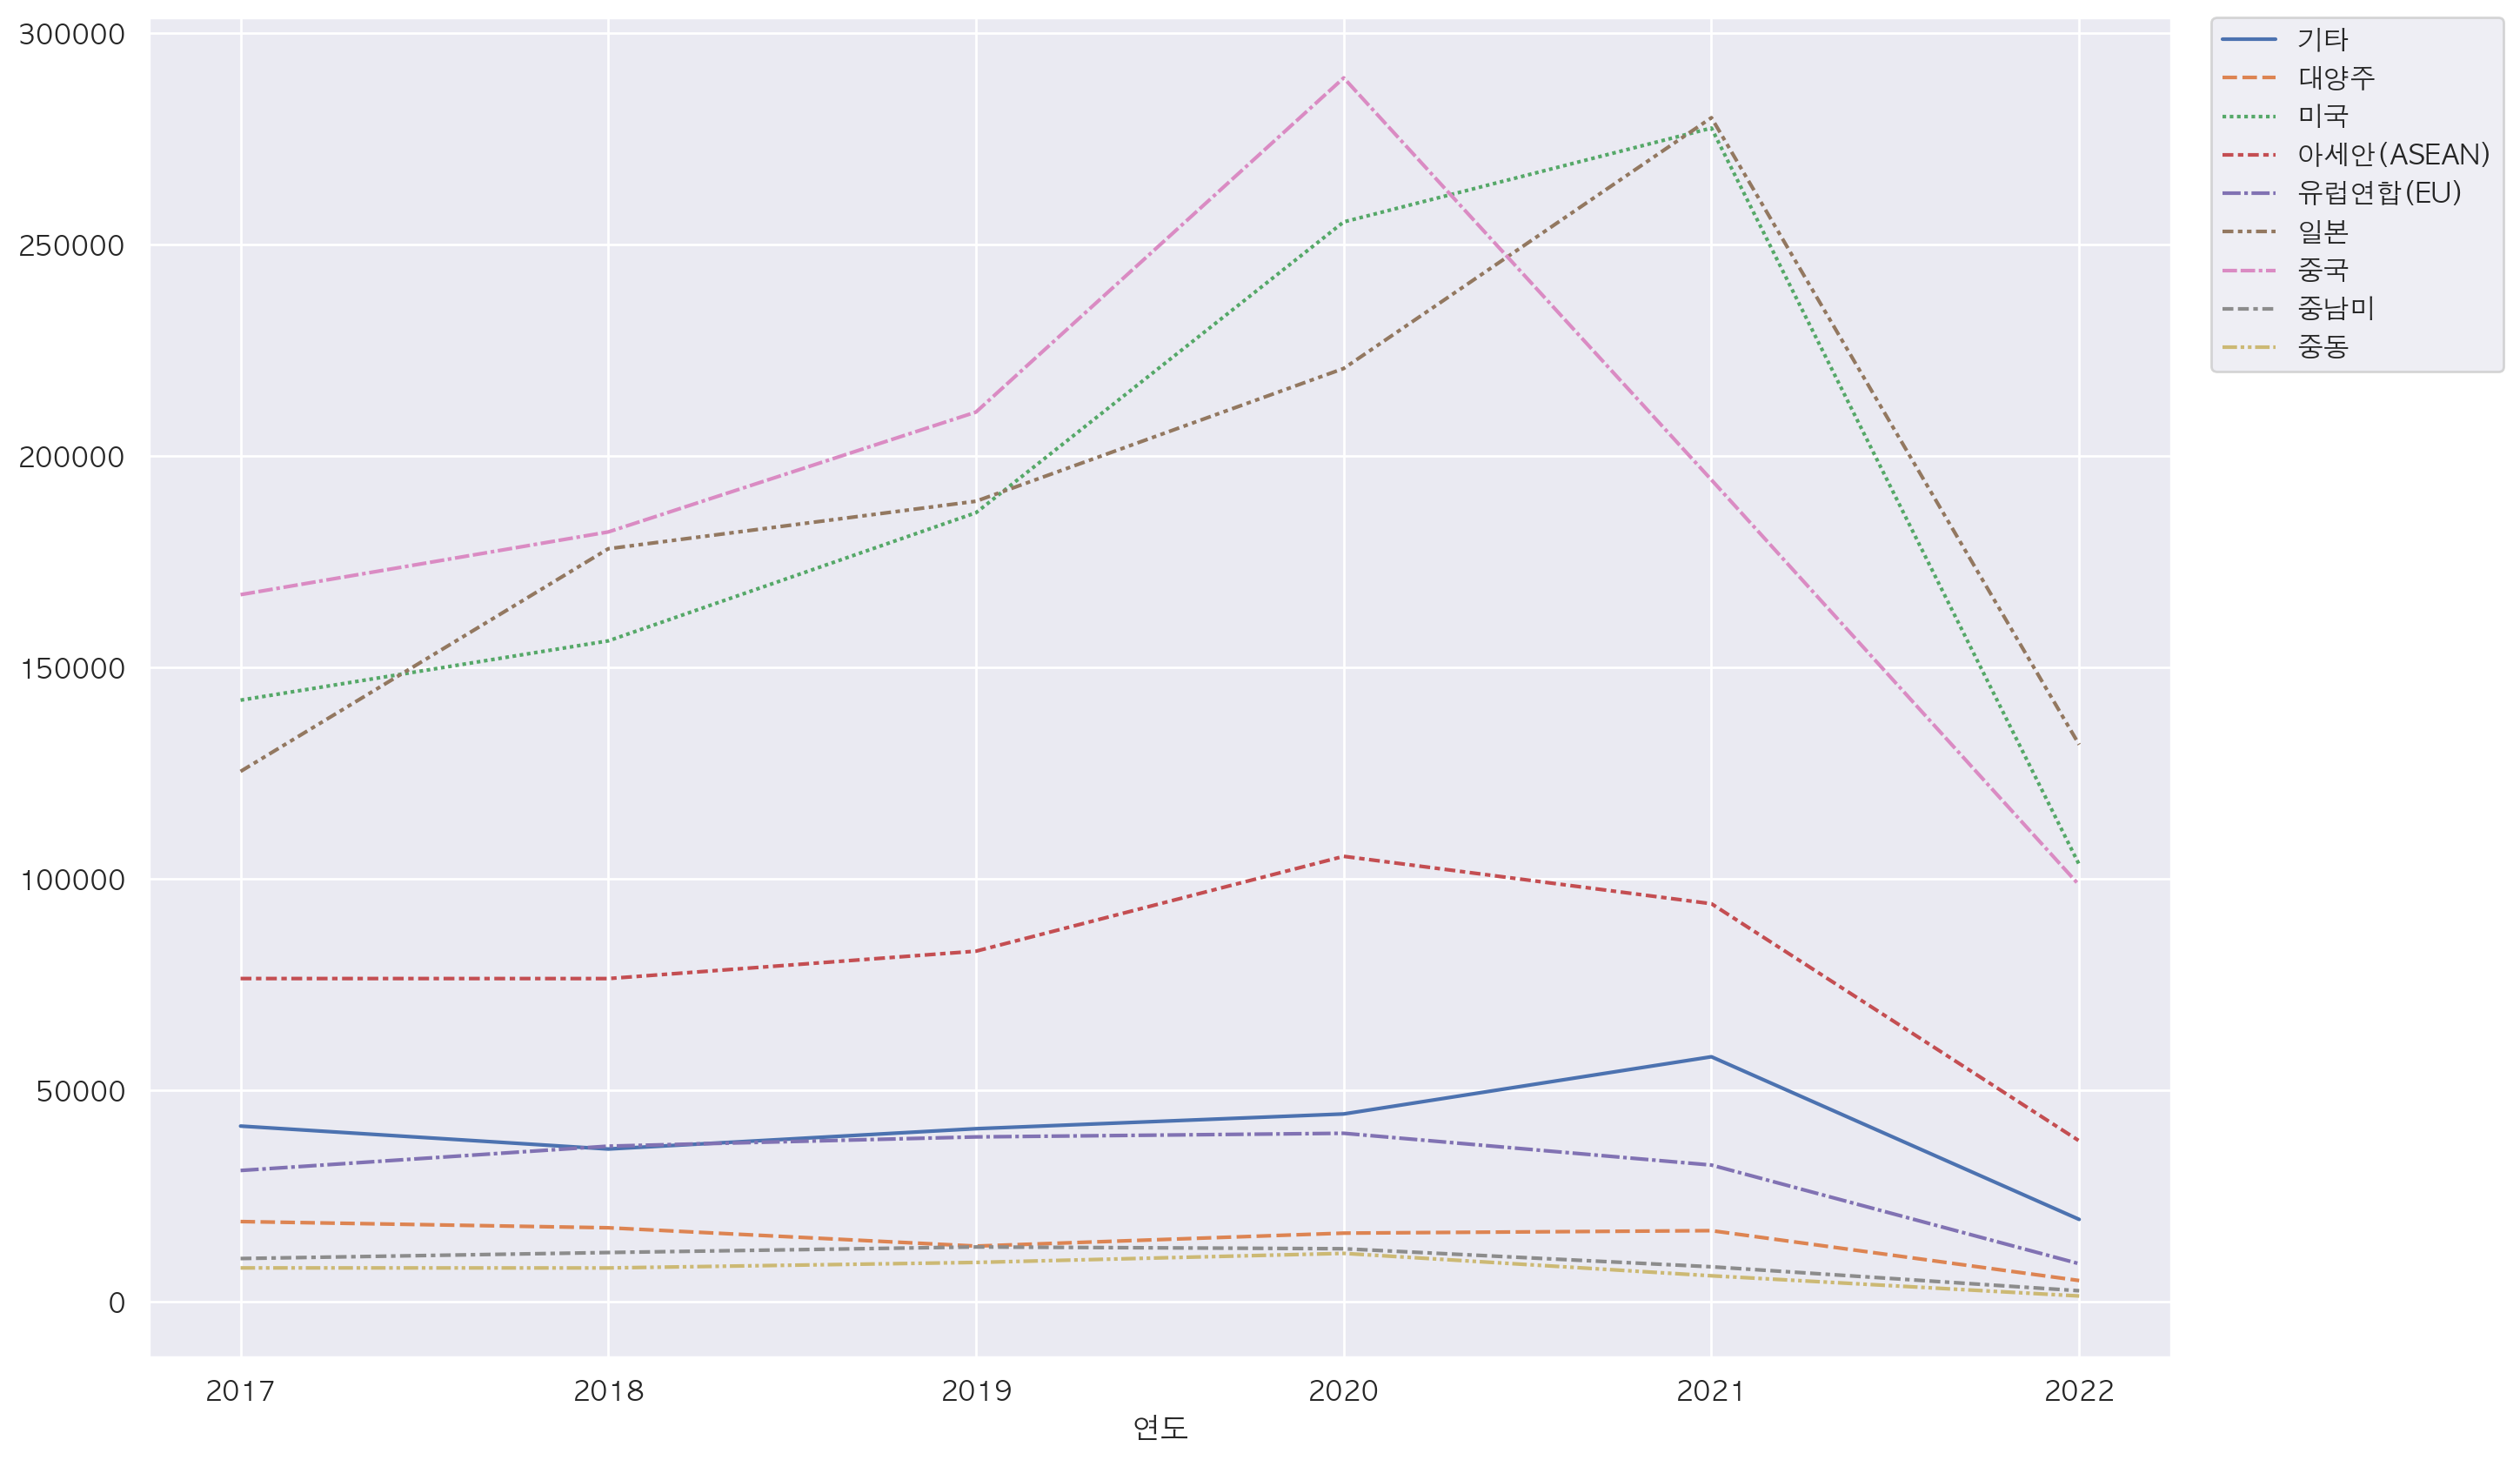

In [17]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_country_year.T)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)
plt.show()

In [18]:
# 미국 일본 중국이 타 국가에 비해 상당히 높다. 
# 코로나의 시작인 2020년에 급상승하는 모습을 보인다. 

In [19]:
df_country_subject = df.pivot_table(index='국가(대륙)별', columns='상품군별', values='백만원', aggfunc='sum')
df_country_subject

상품군별,가전·전자·통신기기,기 타,농축수산물,사무·문구,생활용품 및 자동차용품,서 적,소프트웨어,스포츠·레저용품,아동·유아용품,음·식료품,음반·비디오·악기,의류 및 패션 관련상품,컴퓨터 및 주변기기,화장품
국가(대륙)별,,,,,,,,,,,,,,
기타,10229.0,19956.0,27.0,753.0,10477.0,23602.0,215.0,3433.0,10042.0,3330.0,27266.0,31925.0,26485.0,72820.0
대양주,19075.0,4785.0,12.0,196.0,7158.0,1965.0,136.0,3576.0,2931.0,741.0,8561.0,20456.0,2090.0,16158.0
미국,41748.0,150888.0,128.0,5947.0,52839.0,49703.0,3723.0,27515.0,23442.0,10896.0,132356.0,380751.0,29955.0,211709.0
아세안(ASEAN),51038.0,15445.0,138.0,13839.0,33714.0,27261.0,76.0,33371.0,21209.0,9330.0,66642.0,150556.0,3465.0,47335.5
유럽연합(EU),14466.0,18038.0,3.0,1032.0,12256.0,2717.0,580.0,5775.0,6665.0,698.0,44452.0,26368.0,10844.0,44241.0
일본,7899.0,151123.0,30.0,11899.0,23696.0,5124.0,61.0,4665.0,3837.0,29256.0,56056.0,645969.0,728.0,185053.0
중국,6217.0,52203.0,418.0,1762.0,59043.0,45442.0,110.0,12460.0,28813.0,14775.0,291703.0,408602.0,847.0,219729.0
중남미,4634.0,2964.0,0.0,233.0,8406.0,2063.0,101.0,1333.0,1048.0,783.0,24119.0,3238.0,1483.0,7980.0
중동,4032.0,2323.0,0.0,33.0,6234.0,1025.0,92.0,900.0,805.0,999.0,7459.0,6273.0,1760.0,12459.0


<Axes: xlabel='국가(대륙)별', ylabel='상품군별'>

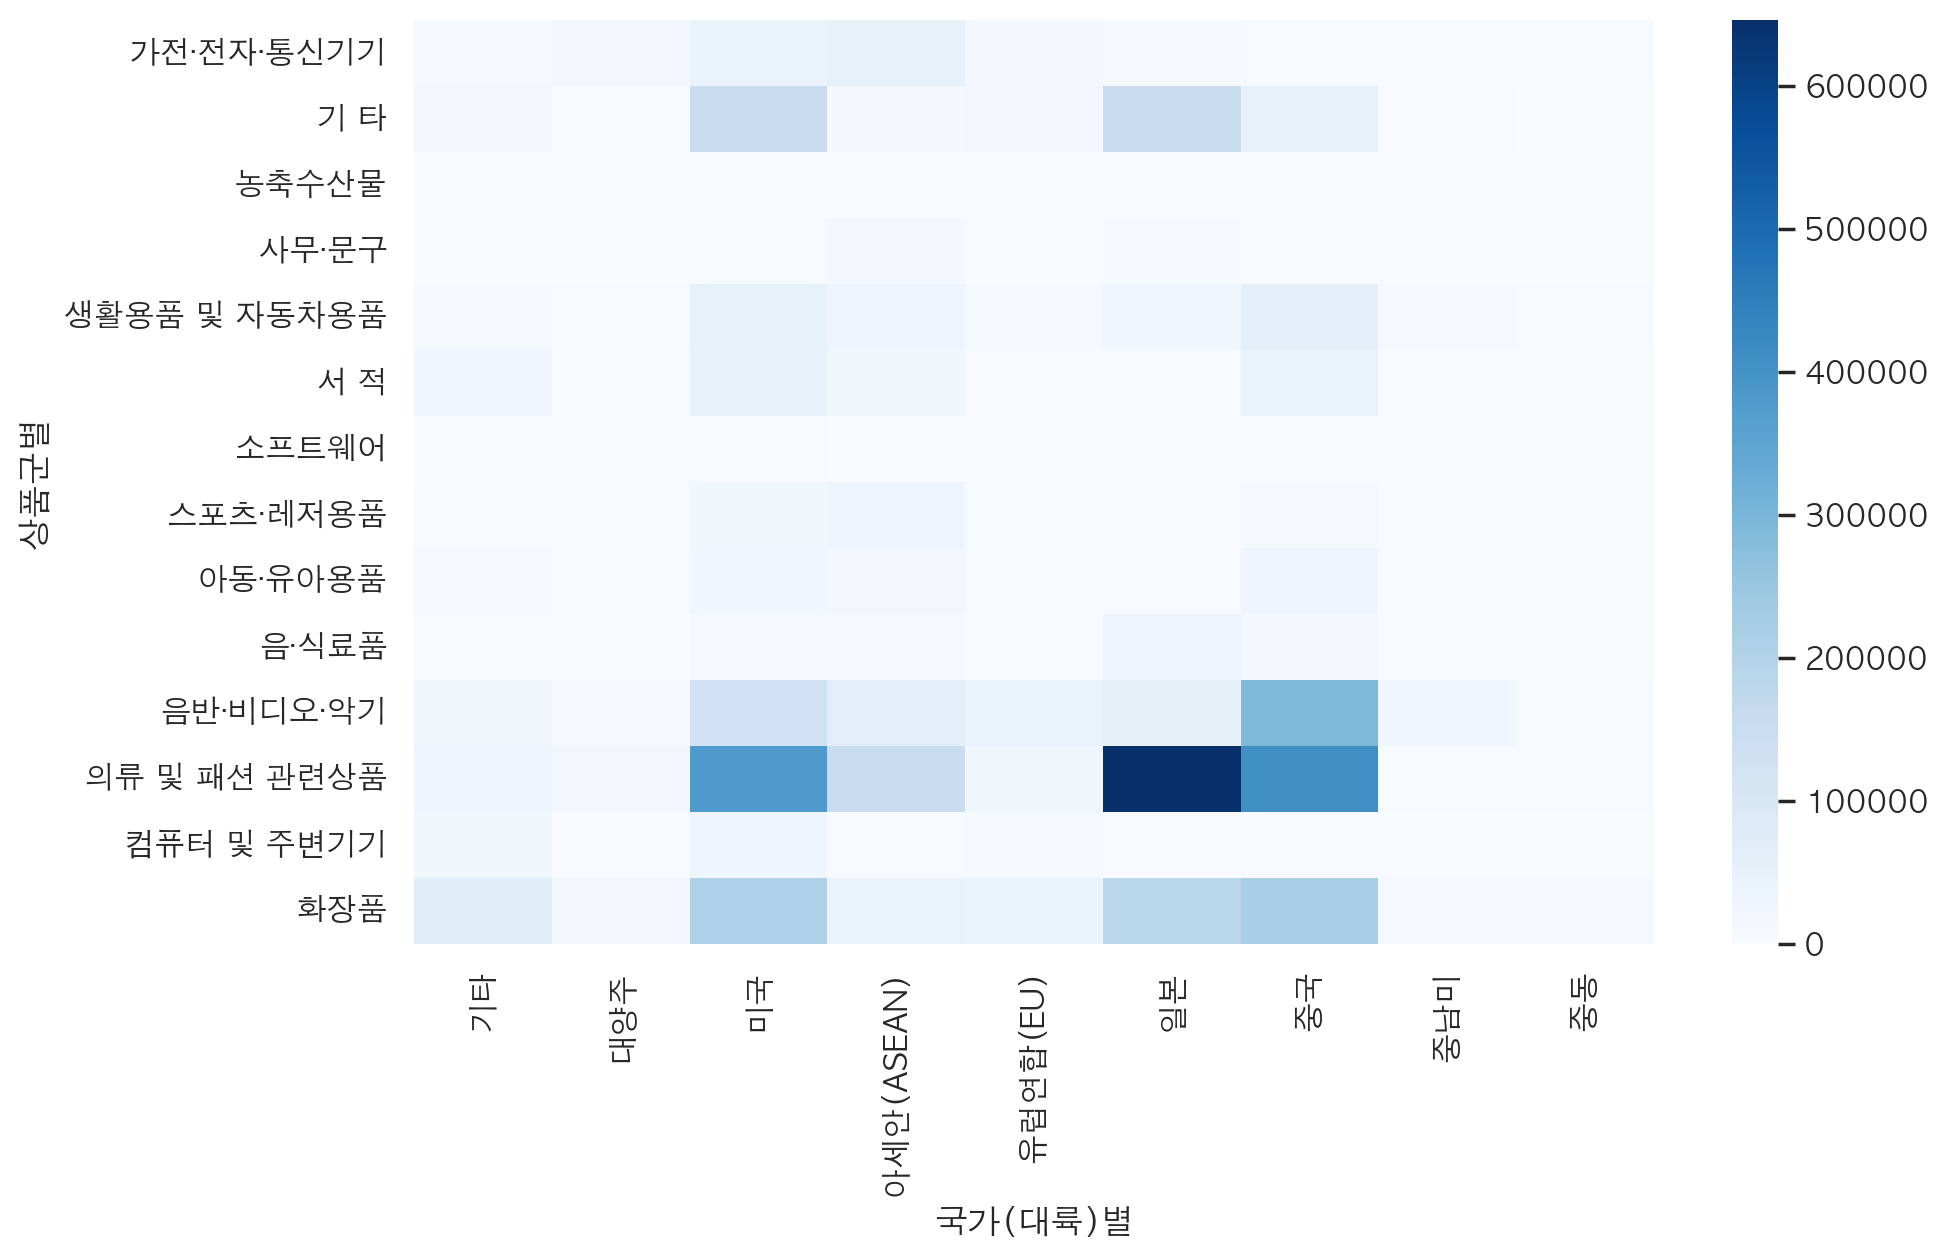

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df_country_subject.T, cmap='Blues')

In [21]:
# 주요 나라인 미국 일본 중국의 주요 상품군 (음반비디오악기, 의류및패션, 화장품)을 확인해보자 

In [22]:
df_filter = df[(df['상품군별'].isin(['의류 및 패션 관련상품', '화장품', '음반·비디오·악기'])) & (df['국가(대륙)별'].isin(['미국', '중국', '일본'])) & (df['연도']<=2021)]

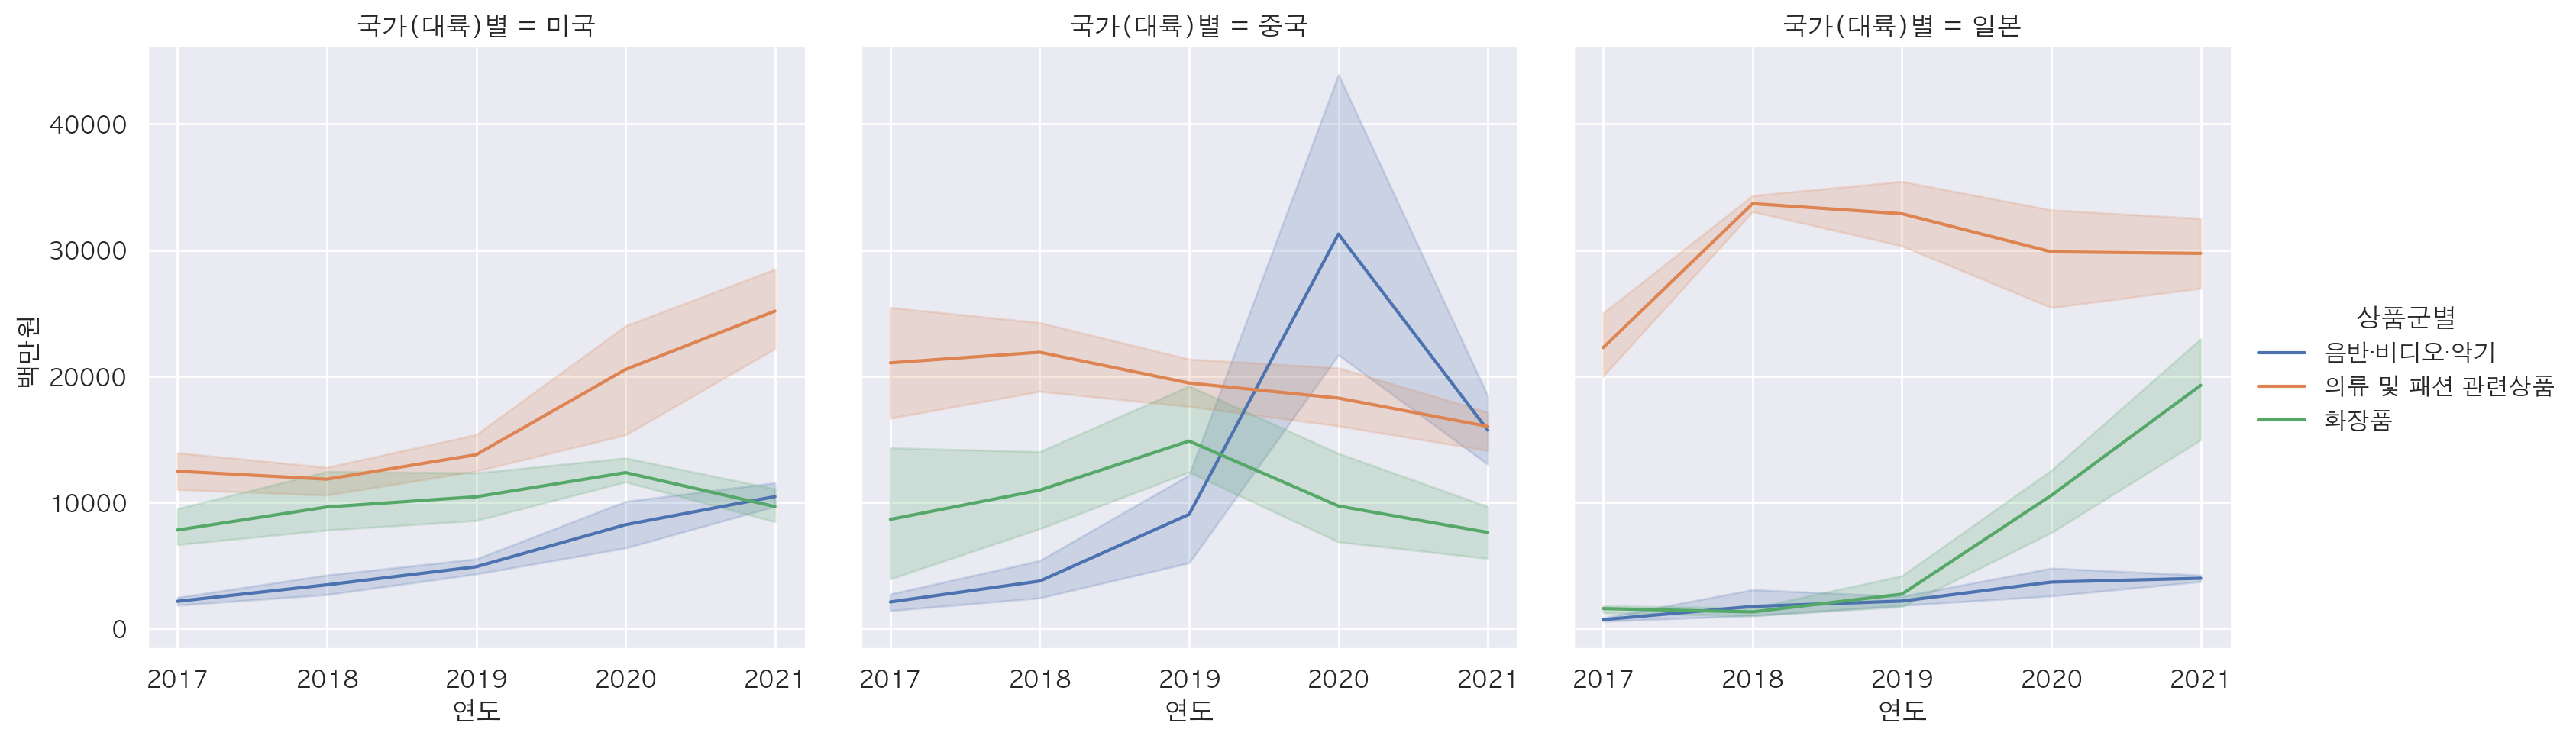

In [23]:
g = sns.relplot(data=df_filter, x='연도', y='백만원', hue='상품군별', kind='line', col='국가(대륙)별', col_wrap=3)
g.set(xticks=df_filter['연도'].unique())  # xticks를 데이터의 고유 연도 값으로 설정
plt.show()


In [24]:
# 미국은 전체적으로 시간이 지날 수록 상승하는 모습을 보이고 
# 중국은 2020년에 음반 구매량이 일시적으로 폭발했었으나 금새 내려왔다. 전체적으로는 상승하고 있는 추세
# 일본은 의류 및 패션에 꾸준한 강세를 보이며 2021년 화장품의 판매 급상승이 눈에 띈다. 

In [ ]:
# plotly를 이용해 주요 국가 3곳의 원형 차트를 그려보자 

In [43]:
import plotly.express as px

# 미국, 중국, 일본에 해당하는 데이터 선택
selected_countries = ['미국', '중국', '일본']
df_selected_countries = df[df['국가(대륙)별'].isin(selected_countries)]

# 국가와 상품군에 대한 백만원 합계 계산
total_by_country_category = df_selected_countries.groupby(['국가(대륙)별', '상품군별'])['백만원'].sum().unstack()

colors = px.colors.sequential.Blues

# plotly express를 사용하여 파이 차트 생성
fig = px.pie(total_by_country_category.T.stack().reset_index(), 
             names='상품군별',
             values=0,
             color='상품군별',
             title='나라별 상품군 비율',
             facet_col='국가(대륙)별', 
             color_discrete_sequence=colors)

# 레이아웃 설정
fig.update_traces(textposition='inside', textinfo='percent', pull=[0.05, 0.05, 0.05])

# 표시
fig.show()


In [38]:
# 미국과 일본은 의류 및 화장품, 중국은 의류 및 음반이 과반수를 차지하는 것을 확인 할 수 있었다. 